In [7]:
from __future__ import annotations
import FinanceDataReader as fdr
from models.WavePattern import WavePattern
from models import WaveRules
from models.WaveAnalyzer import WaveAnalyzer
from models.WaveOptions import WaveOptionsGenerator5, WaveOptionsGeneratorCustom5
from models.helpers import plot_pattern
import pandas as pd
import numpy as np

import importlib

importlib.reload(WaveRules)

# df = pd.read_csv(r"data/btc-usd_1d.csv")
# df


df = fdr.DataReader("454910", "2023-10-25", "2023-12-23").reset_index()[
    ["Date", "Open", "High", "Low", "Close"]
]

idx_start = np.argmin(np.array(list(df["Low"])))

wa = WaveAnalyzer(df=df, verbose=False)
wave_options_impulse = WaveOptionsGeneratorCustom5(
    up_to=5
)  # generates WaveOptions up to [15, 15, 15, 15, 15]

# impulse = Impulse("impulse")
# leading_diagonal = LeadingDiagonal("leading diagonal")
# correction = Correction("correction")
# tdwave = TDWave("TD Wave")
impulse_custom = WaveRules.ImpulseCustom("impulse_custom")
# rules_to_check = [impulse, leading_diagonal, correction, tdwave]
rules_to_check = [impulse_custom]

print(f"Start at idx: {idx_start}")
print(f"will run up to {wave_options_impulse.number / 1e6}M combinations.")

# set up a set to store already found wave counts
# it can be the case, that 2 WaveOptions lead to the same WavePattern.
# This can be seen in a chart, where for example we try to skip more maxima as there are. In such a case
# e.g. [1,2,3,4,5] and [1,2,3,4,10] will lead to the same WavePattern (has same sub-wave structure, same begin / end,
# same high / low etc.
# If we find the same WavePattern, we skip and do not plot it

wavepatterns_up = set()

# loop over all combinations of wave options [i,j,k,l,m] for impulsive waves sorted from small, e.g.  [0,1,...] to
# large e.g. [3,2, ...]
for new_option_impulse in wave_options_impulse.options_sorted:
    waves_up = wa.find_impulsive_wave(
        idx_start=idx_start, wave_config=new_option_impulse.values
    )
    # print(new_option_impulse)
    if waves_up:
        wavepattern_up = WavePattern(waves_up, verbose=True)

        for rule in rules_to_check:
            if wavepattern_up.check_rule(rule):
                if wavepattern_up in wavepatterns_up:
                    print("SKIPPING")
                    continue
                else:
                    wavepatterns_up.add(wavepattern_up)
                    print(f"{rule.name} found: {new_option_impulse.values}")
                    fig = plot_pattern(
                        df=df,
                        wave_pattern=wavepattern_up,
                        title=str(new_option_impulse),
                    )
                    if fig:
                        fig.show()
            # else:
            # plot_pattern(
            #     df=df,
            #     wave_pattern=wavepattern_up,
            #     title=str(new_option_impulse),
            # )

Start at idx: 2
will run up to 0.003125M combinations.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.
Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.
Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.
Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그

w5_4
Rule Violation of impulse_custom for condition w5_4: wave5 는 wave3 대각길이의 0.24 ~ 1.0 사이에 있어야 합니다.
impulse_custom found: [0, 0, 3, 0, 2]


Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w3_2
Rule Violation of impulse_custom for condition w3_2: wave3 는 wave1 의 대각길이의 1.62 이상이어야 합니다.
w5_2
Diagonal test
impulse_custom found: [2, 0, 1, 0, 0]


w5_2
Diagonal test
impulse_custom found: [2, 0, 1, 0, 1]


impulse_custom found: [2, 0, 1, 0, 2]


Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.
w5_1
Rule Violation of impulse_custom for condition w5_1: wave5 는 wave3 고점보다 위에 있어야 합니다.
w5_1
Rule Violation of impulse_custom for condition w5_1: wave5 는 wave3 고점보다 위에 있어야 합니다.
impulse_custom found: [2, 0, 3, 1, 2]


Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fibonacci level 보다 높아야 합니다.
w2_1
Rule Violation of impulse_custom for condition w2_1: wave2 의 되돌림이 0.3 fib

In [2]:
wave_configs = [
    [2, 0, 1, 0, 0],
    [2, 0, 2, 0, 0],
    [2, 0, 3, 0, 0],
]

for wave_config in wave_configs:
    waves_up = wa.find_impulsive_wave(idx_start=idx_start, wave_config=wave_config)

    if waves_up:
        wavepattern_up = WavePattern(waves_up, verbose=True)

        for rule in rules_to_check:
            if wavepattern_up.check_rule(rule):
                if wavepattern_up in wavepatterns_up:
                    print("SKIPPING")
                    plot_pattern(
                        df=df,
                        wave_pattern=wavepattern_up,
                        title=str(wave_config),
                    )
                    continue
                else:
                    wavepatterns_up.add(wavepattern_up)
                    print(f"{rule.name} found: {wave_config}")
                    plot_pattern(
                        df=df,
                        wave_pattern=wavepattern_up,
                        title=str(new_option_impulse),
                    )
            else:
                plot_pattern(
                    df=df,
                    wave_pattern=wavepattern_up,
                    title=str(new_option_impulse),
                )

w5_2
Diagonal test
SKIPPING


Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.


In [ ]:
import math


def calculate_price_changes(prices):
    """주어진 가격 리스트로부터 가격 변동을 계산합니다."""
    return [prices[i] - prices[i - 1] for i in range(1, len(prices))]


def calculate_average_price_change(prices):
    """가격 변동의 평균을 계산합니다."""
    price_changes = calculate_price_changes(prices)
    return sum(price_changes) / len(price_changes)


def normalize_prices(prices):
    """평균 가격 변동을 기준으로 가격 데이터를 정규화합니다."""
    average_change = calculate_average_price_change(prices)
    return [price / average_change for price in prices]


def calculate_diagonal_distance(prices, start_day, end_day):
    """
    정규화된 시간과 가격 데이터를 사용하여 두 시점 사이의 대각선 거리를 계산합니다.
    """
    normalized_prices = normalize_prices(prices)
    time_difference = end_day - start_day
    price_difference = normalized_prices[end_day - 1] - normalized_prices[start_day - 1]
    return math.sqrt(time_difference**2 + price_difference**2)


# 예제 가격 데이터
example_prices = [1000, 1100, 1050, 1200, 1150]

# 1일과 5일 사이의 대각선 거리 계산
diagonal_distance_example = calculate_diagonal_distance(example_prices, 1, 5)
diagonal_distance_example

In [3]:
wave_config = [2, 0, 2, 0, 0]
waves_up = wa.find_impulsive_wave(idx_start=idx_start, wave_config=wave_config)

if waves_up:
    wavepattern_up = WavePattern(waves_up, verbose=True)

    for rule in rules_to_check:
        if wavepattern_up.check_rule(rule):
            if wavepattern_up in wavepatterns_up:
                print("SKIPPING")
                plot_pattern(
                    df=df,
                    wave_pattern=wavepattern_up,
                    title=str(wave_config),
                )
                continue
            else:
                wavepatterns_up.add(wavepattern_up)
                print(f"{rule.name} found: {wave_config}")
                plot_pattern(
                    df=df,
                    wave_pattern=wavepattern_up,
                    title=str(new_option_impulse),
                )
        else:
            plot_pattern(
                df=df,
                wave_pattern=wavepattern_up,
                title=str(new_option_impulse),
            )

Rule Violation of impulse_custom for condition w4_2: wave3 의 피보나치 0.24 이상 그리고 wave1 고점보다 높아야 합니다.


In [4]:
def calculate_fibonacci_level(low, high, fib_ratio, mode="low_to_high"):
    """
    Calculate the Fibonacci level based on a given ratio and mode.

    :param low: The low point of the wave.
    :param high: The high point of the wave.
    :param fib_ratio: The Fibonacci ratio to apply.
    :param mode: The mode of calculation ('low_to_high' or 'high_to_low').
    :return: The calculated Fibonacci level.
    """
    if mode == "low_to_high":
        return low + (high - low) * fib_ratio
    elif mode == "high_to_low":
        return high - (high - low) * fib_ratio
    else:
        raise ValueError("Invalid mode. Use 'low_to_high' or 'high_to_low'.")


# 예제 사용
low_point = 100
high_point = 200
fibonacci_ratio = 0.618  # 피보나치 비율 예시

# 저점에서 고점까지 계산
fibonacci_level_low_to_high = calculate_fibonacci_level(
    low_point, high_point, fibonacci_ratio, "low_to_high"
)
print(
    f"Low to High Fibonacci level at ratio {fibonacci_ratio} is: {fibonacci_level_low_to_high}"
)

# 고점에서 저점까지 계산
fibonacci_level_high_to_low = calculate_fibonacci_level(
    low_point, high_point, fibonacci_ratio, "high_to_low"
)
print(
    f"High to Low Fibonacci level at ratio {fibonacci_ratio} is: {fibonacci_level_high_to_low}"
)

Low to High Fibonacci level at ratio 0.618 is: 161.8
High to Low Fibonacci level at ratio 0.618 is: 138.2


In [5]:
fibonacci_ratio = 0.3
fibonacci_level_high_to_low = calculate_fibonacci_level(
    low_point, high_point, fibonacci_ratio, "high_to_low"
)
print(
    f"High to Low Fibonacci level at ratio {fibonacci_ratio} is: {fibonacci_level_high_to_low}"
)

High to Low Fibonacci level at ratio 0.3 is: 170.0


In [3]:
import FinanceDataReader as fdr

df = fdr.DataReader("454910", "2023-10-25", "2023-12-23").reset_index()[
    ["Date", "Open", "High", "Low", "Close"]
]

In [7]:
df.to_csv("test.csv")

In [ ]:
32150	48500	16350
76900	97900	21000

In [3]:
wave1 = {
    "duration": 9,
    "points": (32150, 48500),
}

wave2 = {
    "duration": 3,
    "points": (76900, 97900),
}

In [23]:
width1 = wave1["duration"]
width2 = wave2["duration"]
print(width1, width2)

height1 = abs(wave1["points"][1] - wave1["points"][0])
height2 = abs(wave2["points"][1] - wave2["points"][0])
print(height1, height2)

low_y = min(wave1["points"][0], wave2["points"][0])
high_y = max(wave1["points"][1], wave2["points"][1])


# print(total_height)

9 3
16350 21000
65750


In [45]:
import math

min_x = min(width1, width2)
total_height = high_y - low_y

x1 = width1 / min_x
x2 = width2 / min_x
y1 = height1 / total_height * 100
y2 = height2 / total_height * 100

y_to_x_ratio = min(y1, y2) / max_x

y1 /= y_to_x_ratio
y2 /= y_to_x_ratio

len1 = math.sqrt(x1**2 + y1**2)
len2 = math.sqrt(x2**2 + y2**2)

len1, len2

(4.242640687119285, 3.98085858593622)

In [46]:
len1 / len2

1.0657602111534186

In [27]:
x1 = width1 / min_x
x2 = width2 / min_x
print(x1, x2)
max_x = max(x1, x2)
max_x

3.0 1.0


3.0

In [39]:
y1 = height1 / total_height * 100
y2 = height2 / total_height * 100
y1, y2

(24.866920152091254, 31.93916349809886)

In [40]:
y_to_x_ratio = min(y1, y2) / max_x
y_to_x_ratio

8.288973384030419

In [41]:
y1 /= y_to_x_ratio
y2 /= y_to_x_ratio

In [42]:
y1, y2

(3.0, 3.853211009174312)

In [43]:
import math

len1 = math.sqrt(x1**2 + y1**2)
len2 = math.sqrt(x2**2 + y2**2)

In [44]:
len1 / len2

1.0657602111534186

## 수정된 로직


In [1]:
# wave1 = {
#     "duration": 9,
#     "points": (32150, 48500),
# }

# wave2 = {
#     "duration": 3,
#     "points": (76900, 97900),
# }

wave1 = {
    "duration": 9,
    "points": (25850, 33150),
}

wave2 = {
    "duration": 3,
    "points": (34300, 45000),
}

In [22]:
x_to_y_ratio = 2.0

width1 = wave1["duration"]
width2 = wave2["duration"]
print(width1, width2)

height1 = abs(wave1["points"][1] - wave1["points"][0])
height2 = abs(wave2["points"][1] - wave2["points"][0])
print(height1, height2)

max_x = max(width1, width2)
max_y = max(height1, height2)
max_height = max(height1, height2)
low_y = min(
    wave1["points"][0], wave1["points"][1], wave2["points"][0], wave2["points"][1]
)
high_y = max(
    wave1["points"][0], wave1["points"][1], wave2["points"][0], wave2["points"][1]
)
print(low_y, high_y)

width1 /= max_x
width2 /= max_x
print(width1, width2)

width1 *= x_to_y_ratio
width2 *= x_to_y_ratio

height1 /= max_height
height2 /= max_height
print(height1, height2)

diagonal1 = math.sqrt(width1**2 + height1**2)
diagonal2 = math.sqrt(width2**2 + height2**2)
print(diagonal1, diagonal2)

9 3
16350 21000
32150 97900
1.0 0.3333333333333333
0.7785714285714286 1.0
2.14619977387655 1.2018504251546631


In [23]:
import math

diagonal1 = math.sqrt(width1**2 + height1**2)
diagonal2 = math.sqrt(width2**2 + height2**2)
print(diagonal1)
print(diagonal2)

2.14619977387655
1.2018504251546631


In [17]:
diagonal1 / diagonal2

1.2023128222093364

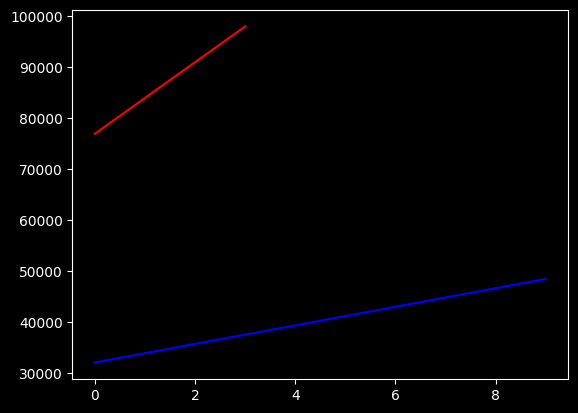

In [6]:
import matplotlib.pyplot as plt

plt.plot([0, width1], [wave1["points"][0], wave1["points"][1]], color="blue")
plt.plot([0, width2], [wave2["points"][0], wave2["points"][1]], color="red")